## This is for a Kaggle competition where we predict the survival of the Titanic passengers.

### To compare which model to use: KNN, Decision Tree, SVM, Logistic Regression, Random Forest or XGB.

Lets first load required libraries:

In [99]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import re
import seaborn as sns

Lets download the dataset

### Load Data From CSV File  

In [100]:
df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/titanic/train.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [101]:
df.shape

(891, 12)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

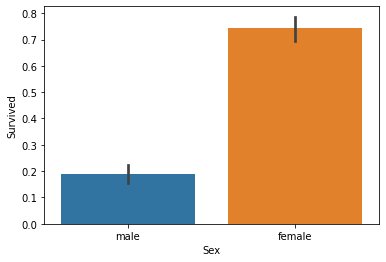

In [102]:
sns.barplot(x=df['Sex'], y=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

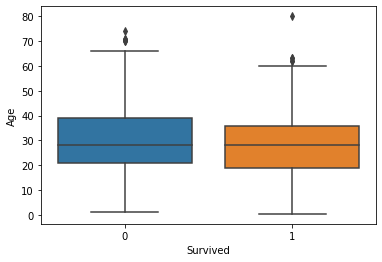

In [103]:
sns.boxplot(x=df['Survived'],y=df['Age'])

C:\Users\taihs\anaconda3\envs\new_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

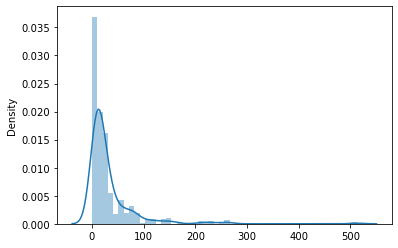

In [104]:
sns.distplot(x=df['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

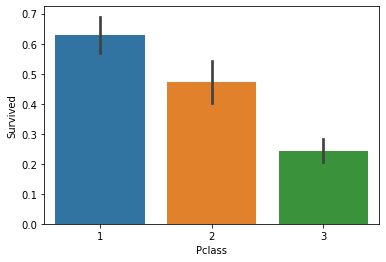

In [105]:
sns.barplot(x=df['Pclass'],y=df['Survived'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

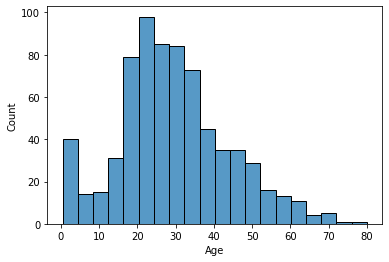

In [106]:
sns.histplot(x=df['Age'])

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

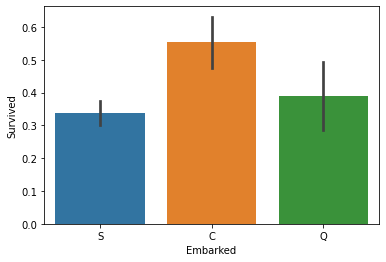

In [107]:
sns.barplot(x=df['Embarked'],y=df['Survived'])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

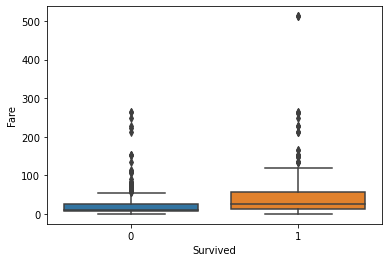

In [108]:
sns.boxplot(x=df['Survived'],y=df['Fare'])

In [109]:
namelst = df['Name'].tolist()

lst1=[]
for i in namelst:
    lst=re.findall("Mr.|Mrs|Miss|Master",i)
    if len(lst)>0:
        lst1.append(lst[0])
    else:
        lst1.append('None')

titledf=pd.DataFrame({'title':lst1})
titledf.value_counts()

title 
Mr.       517
Miss      182
Mrs       127
Master     40
None       24
Mr          1
dtype: int64

In [110]:
titledf.replace(to_replace=['Mr.','Mr '],value='Mr',inplace=True)

titledf.value_counts()

title 
Mr        518
Miss      182
Mrs       127
Master     40
None       24
dtype: int64

<AxesSubplot:xlabel='title', ylabel='Survived'>

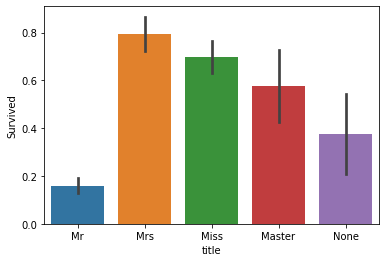

In [111]:
sns.barplot(x=titledf['title'],y=df['Survived'])

In [112]:
pd.crosstab(titledf['title'],df['Survived'])

Survived,0,1
title,,
Master,17,23
Miss,55,127
Mr,436,82
Mrs,26,101
None,15,9


### Test which feature is important

In [113]:
pd.crosstab(df['Embarked'],df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [114]:
from scipy.stats import chi2_contingency

lst = df.select_dtypes(include='object')

chi=[]
for i in lst:
    if chi2_contingency(pd.crosstab(df['Survived'], df[i]))[1] < 0.05:
        chi.append(i)
chi

['Sex', 'Ticket', 'Embarked']

In [115]:
gp=df.groupby(['Embarked','Survived'])
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [116]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna('S')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data visualization and pre-processing



## Convert Categorical features to numerical values

Lets look at gender:

In [117]:
df.groupby(['Embarked'])['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

In [118]:
df.groupby(['Cabin'])['Survived'].value_counts(normalize=True)
df['Cabin'].value_counts()
df['Cabin']=df['Cabin'].fillna(0)

In [119]:
df.loc[df['Cabin']!=0, 'Cabin']= 1
df['Cabin'].value_counts()
df.groupby(['Cabin'])['Survived'].value_counts(normalize=True)

Cabin  Survived
0      0           0.700146
       1           0.299854
1      1           0.666667
       0           0.333333
Name: Survived, dtype: float64

In [120]:
df.groupby(['Fare'])['Survived'].value_counts(normalize=True)
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64

Lets convert male to 0 and female to 1:


In [121]:
#df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#pd.get_dummies(df['Sex'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [122]:
#df['Embarked'].replace(to_replace=['S','C','Q'], value=[0,1,2],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [123]:
df['Fare']=df['Fare'].astype(int)
df['Age']=df['Age'].astype(int)
df['Cabin']=df['Cabin'].astype(int)
df_sex=pd.get_dummies(df['Sex'])
df_embarked=pd.get_dummies(df['Embarked'])
df_title = pd.get_dummies(titledf['title'])
#Feature=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
#Feature=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
Feature=df[['Pclass','Age','SibSp','Parch','Fare','Cabin']] + df_sex + df_embarked
Feature=pd.concat([df[['Pclass','Age','SibSp','Parch','Fare','Cabin']],df_sex,df_embarked,df_title],axis=1)
Feature.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S,Master,Miss,Mr,Mrs,None
0,3,22,1,0,7,0,0,1,0,0,1,0,0,1,0,0
1,1,38,1,0,71,1,1,0,1,0,0,0,0,0,1,0
2,3,26,0,0,7,0,1,0,0,0,1,0,1,0,0,0
3,1,35,1,0,53,1,1,0,0,0,1,0,0,0,1,0
4,3,35,0,0,8,0,0,1,0,0,1,0,0,1,0,0


In [124]:
df['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

### Feature selection

Lets defind feature sets, X:

In [125]:
X = Feature
X[0:5]
X.shape

(891, 16)

What are our lables?

In [126]:
y = df['Survived']
y[0:5]
y.shape

(891,)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [127]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.82737724, -0.58004441,  0.43279337, -0.47367361, -0.49894756,
        -0.54492498, -0.73769513,  0.73769513, -0.48204268, -0.30756234,
         0.61583843, -0.21680296, -0.50665528,  0.84857364, -0.40771358,
        -0.16637807],
       [-1.56610693,  0.65011226,  0.43279337, -0.47367361,  0.78940535,
         1.835115  ,  1.35557354, -1.35557354,  2.0745051 , -0.30756234,
        -1.62380254, -0.21680296, -0.50665528, -1.17844811,  2.45270219,
        -0.16637807],
       [ 0.82737724, -0.27250525, -0.4745452 , -0.47367361, -0.49894756,
        -0.54492498,  1.35557354, -1.35557354, -0.48204268, -0.30756234,
         0.61583843, -0.21680296,  1.97372855, -1.17844811, -0.40771358,
        -0.16637807],
       [-1.56610693,  0.41945788,  0.43279337, -0.47367361,  0.4270561 ,
         1.835115  ,  1.35557354, -1.35557354, -0.48204268, -0.30756234,
         0.61583843, -0.21680296, -0.50665528, -1.17844811,  2.45270219,
        -0.16637807],
       [ 0.82737724,  0.41945788, -0

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (712, 16) (712,)
Test set: (179, 16) (179,)


In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [130]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.73743017, 0.74301676, 0.80446927, 0.79329609, 0.79329609,
       0.79888268, 0.79888268, 0.79888268, 0.79888268])

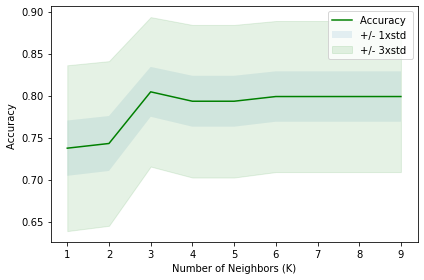

In [131]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# XGBoost

In [133]:
xgb = XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)

[17:57:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Random Forest

In [134]:
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [135]:
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

#print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
#print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [137]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
Tree # it shows the default parameters
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [138]:
predTree = Tree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 1 0 0 1]
350    0
176    0
723    0
404    0
306    1
Name: Survived, dtype: int64


# Support Vector Machine

In [139]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [140]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 1, 1], dtype=int64)

# Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [142]:
yhat = LR.predict(X_test)
yhat [0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [143]:
neigh = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)
yhat2 = Tree.predict(X_test)
yhat3 = clf.predict(X_test)
yhat4 = LR.predict(X_test)
yhat5 = rf_model.predict(X_test)
yhat6 = xgb.predict(X_test)

In [144]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print ('KNN F1-score: ' ,f1_score(y_test, yhat1, average='weighted'))
print ('Decision Tree F1-score: ',f1_score(y_test, yhat2, average='weighted'))
print ('SVM F1-score: ',f1_score(y_test, yhat3, average='weighted') )
print ('Logistic Reg F1-score: ',f1_score(y_test, yhat4, average='weighted') )
print ('Random Forest F1-score: ',f1_score(y_test, yhat5, average='weighted') )
print ('XGB F1-score: ',f1_score(y_test, yhat6, average='weighted') )


print ('KNN accuracy: ' ,accuracy_score(y_test, yhat1))
print ('Decision Tree accuracy: ',accuracy_score(y_test, yhat2))
print ('SVM accuracy: ',accuracy_score(y_test, yhat3) )
print ('Logistic Reg accuracy: ',accuracy_score(y_test, yhat4) )
print ('Random Forest accuracy: ',accuracy_score(y_test, yhat5) )
print ('XGB accuracy: ',accuracy_score(y_test, yhat6) )

KNN F1-score:  0.8046982249918458
Decision Tree F1-score:  0.7930393730863818
SVM F1-score:  0.8036984814841934
Logistic Reg F1-score:  0.7818523121721319
Random Forest F1-score:  0.8158583264208833
XGB F1-score:  0.7983686857962907
KNN accuracy:  0.8044692737430168
Decision Tree accuracy:  0.7932960893854749
SVM accuracy:  0.8044692737430168
Logistic Reg accuracy:  0.7821229050279329
Random Forest accuracy:  0.8156424581005587
XGB accuracy:  0.7988826815642458


# Model Evaluation using Test set

First, download and load the test set:

### Load Test set for evaluation 

In [145]:
test_df = pd.read_csv('C:/Users/taihs/OneDrive/Documents/titanic/test.csv')
test_df.info()
test_df['Age']=test_df['Age'].fillna(test_df['Age'].mean())
#test_df['Embarked']=test_df['Embarked'].fillna(0)
test_df['Fare']=test_df['Fare'].fillna(0)
test_df['Cabin']=test_df['Cabin'].fillna(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [146]:
#test_df['Sex'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [147]:
#test_df['Embarked'].replace(to_replace=['S','C','Q'], value=[0,1,2],inplace=True)

In [148]:
test_df.loc[test_df['Cabin']!=0, 'Cabin'] = 1

In [149]:
test_df['Cabin']=test_df['Cabin'].astype(int)

In [150]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


In [151]:
test_df['Age']=test_df['Age'].astype(int)
test_df['Fare']=test_df['Fare'].astype(int)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    object
 4   Age          418 non-null    int32 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int32 
 9   Cabin        418 non-null    int32 
 10  Embarked     418 non-null    object
dtypes: int32(3), int64(4), object(4)
memory usage: 31.1+ KB


In [152]:
namelst = test_df['Name'].tolist()

lst1=[]
for i in namelst:
    lst=re.findall("Mr.|Mrs|Miss|Master",i)
    if len(lst)>0:
        lst1.append(lst[0])
    else:
        lst1.append('None')

titledf=pd.DataFrame({'title':lst1})
titledf.value_counts()

title 
Mr.       240
Miss       78
Mrs        72
Master     21
None        7
dtype: int64

In [153]:
titledf.replace(to_replace=['Mr.','Mr '],value='Mr',inplace=True)

In [154]:
#X = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']]
df_sex=pd.get_dummies(test_df['Sex'])
df_embarked=pd.get_dummies(test_df['Embarked'])
df_title=pd.get_dummies(titledf['title'])
X = pd.concat([test_df[['Pclass','Age','SibSp','Parch','Fare','Cabin']],df_sex,df_embarked,df_title],axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,C,Q,S,Master,Miss,Mr,Mrs,None
0,3,34,0,0,7,0,0,1,0,1,0,0,0,1,0,0
1,3,47,1,0,7,0,1,0,0,0,1,0,0,0,1,0
2,2,62,0,0,9,0,0,1,0,1,0,0,0,1,0,0
3,3,27,0,0,8,0,0,1,0,0,1,0,0,1,0,0
4,3,22,1,1,12,0,1,0,0,0,1,0,0,0,1,0


In [155]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [156]:
#neigh = KNeighborsClassifier(n_neighbors = 3).fit(X,y)
yhat1 = neigh.predict(X)
yhat2 = Tree.predict(X) 
yhat3 = clf.predict(X)
yhat4 = LR.predict(X)
yhat5 = rf_model.predict(X) # best
yhat6 = xgb.predict(X)

In [157]:
rf_model.feature_importances_

array([0.07111498, 0.23150919, 0.05419443, 0.03571773, 0.17483835,
       0.03491697, 0.13899266, 0.08545116, 0.01460715, 0.00715266,
       0.01218354, 0.00879576, 0.02320445, 0.07752102, 0.02544712,
       0.00435283])

In [158]:
df1=pd.DataFrame({'Survived':yhat5})
df1.head()

,Survived
0,0
1,0
2,0
3,0
4,1


In [159]:
final = pd.concat([test_df['PassengerId'],df1],axis=1)
final.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [98]:
final.to_csv('gender_submission.csv',index=False)